# Part I : Quel(le) data scientist êtes-vous ?
## Contexte de l’analyse

Elu métier le plus sexy par la Harvard Business Review en octobre 2012, le data scientist représente un profil rare qui exige de nombreuses compétences.

A partir d'un dataset Aquila, vous réaliserez :
- un clustering non supervisé afin d'identifier 2 groupes de profils techniques distinctes
- une prédiction des profils dont le métier n'est pas labellisé


## Données
data.csv contient 6 variables : 
    - 'Entreprise' correspond à une liste d'entreprises fictive
    - 'Metier' correspond au métier parmi data scientist, lead data scientist, data engineer et data architecte
    - 'Technologies' correspond aux compétences maîtrisées par le profil
    - 'Diplome' correspond à son niveau scolaire (Bac, Master, PhD,...)
    - 'Experience' correspond au nombre d'années d'expériences
    - 'Ville' correspond au lieu de travail
    


## Répondez aux questions 

Bonne chance!

In [1]:
# Import des libraries classique (numpy, pandas, ...)
import pandas as pd
import numpy as np
import re
import sklearn as sk
import seaborn as sb
from matplotlib import pyplot as plt
plt.style.use('ggplot')

### 1) Importer le tableau de données dans un dataframe 

In [2]:
# Import du dataframe "data.csv"
df = pd.read_csv('data.csv')

### 2) Combien y a t-il d'observations dans ce dataset? Y a t-il des valeurs manquantes? 

## Ligne 

In [3]:
df.shape[0]

9582

## Valeur manquante

In [4]:
df.isna().sum()

Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      94
Ville            0
dtype: int64

### 3) Réaliser l'imputation des valeurs manquantes pour la variable "Experience" avec : 
- la valeur médiane pour les data scientists
- la valeur moyenne pour les data engineers

## DataCleaning

In [5]:
# Remplacer les "," par des "."
df.Experience = df["Experience"].str.replace(",",".")

# Convertir Ecperience vers float

df = df.astype({"Experience" : float})

# Preparer les filtres 

dataSci = df["Metier"].str.match("data scientist",case =False,na = False)
dataEng = df["Metier"].str.match("Data engineer",case =False,na = False)
LeadDataScien = df["Metier"].str.match("Lead data scientist",case =False,na = False)
DataArchi = df["Metier"].str.match("Data architecte",case =False,na = False)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 6 columns):
Entreprise      9565 non-null object
Metier          9563 non-null object
Technologies    9582 non-null object
Diplome         9582 non-null object
Experience      9488 non-null float64
Ville           9582 non-null object
dtypes: float64(1), object(5)
memory usage: 449.3+ KB


In [7]:
medianDataSci = df.loc[dataSci, 'Experience'].median()
moyenneDataEng = df.loc[dataEng, 'Experience'].mean()
print("median = ",medianDataSci)
print("moyenne = ",moyenneDataEng)

median =  2.0
moyenne =  2.984959174903309


In [8]:
# Remplacer les valeurs manquantes par la médian
df.loc[dataSci & df['Experience'].isnull(), 'Experience'] = medianDataSci

In [9]:
# Remplacer les valeurs manquantes par la moyenne

df.loc[dataEng & df['Experience'].isnull(), 'Experience'] = moyenneDataEng

In [10]:
df.head(100)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux
...,...,...,...,...,...,...
95,Cognitive Scale,Data scientist,C++/R/Python/Matlab/Matplotlib,Master,0.5,Lille
96,R/GA,Data scientist,Python/R/machine learning/Excel/VBA/C++,Master,4.0,Lyon
97,Covance,Data engineer,Map-Reduce/HDFS/PIG/HBASE/Python/Cassandra,Phd,1.5,Bordeaux
98,Nift Networks,Data engineer,AWS/Python/C/C++/Docker,Master,2.0,Bordeaux


In [11]:
# Au début on a 94 valeurs manquantes maintenant 42.
df.isna().sum()

Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      42
Ville            0
dtype: int64

### 4) Combien d'années d'expériences ont, en moyenne, chacun des profils : le data scientist, le lead data scientist et le data engineer en moyenne?

In [12]:
df.Metier.unique()

array(['Data scientist', 'Data architecte', 'Lead data scientist',
       'Data engineer', nan], dtype=object)

In [13]:
Moyennes = dict()

Moyennes['Data scientist'] =   df.loc[dataSci, 'Experience'].mean() 


Moyennes['Lead data scientist'] =   df.loc[LeadDataScien, 'Experience'].mean()

Moyennes['Data Engineer'] =  df.loc[dataEng, 'Experience'].mean()

Moyennes['Data Architect'] =  df.loc[DataArchi, 'Experience'].mean()

print("Moyenne des datas Scientists = ",Moyennes['Data scientist'] )

print("Moyenne des Leads datas scientists = ", Moyennes['Lead data scientist'] )

print("Moyenne des Datas engineers = ",Moyennes['Data Engineer'])

#print("Moyenne des Data architect = ",Moyennes['Data Architect'])


Moyenne des datas Scientists =  2.241267787839586
Moyenne des Leads datas scientists =  3.965260545905707
Moyenne des Datas engineers =  2.98495917490331


### 5) Faire la représentation graphique de votre choix afin de comparer le nombre moyen d'années d'expériences pour chaque métier

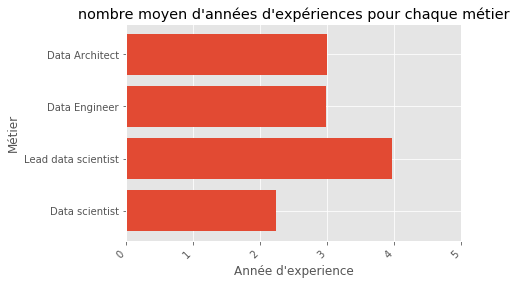

In [14]:
fig, ax = plt.subplots()
ax.barh(list(Moyennes.keys()), list(Moyennes.values()))

labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 5], xlabel="Année d'experience", ylabel='Métier',
       title="nombre moyen d'années d'expériences pour chaque métier")

plt.show()

### 6) Transformer la variable continue 'Experience' en une nouvelle variable catégorielle 'Exp_label' à 4 modalités: débutant, confirmé, avancé et expert
- Veuillez expliquer votre choix du règle de transformation.  

In [15]:
df.Experience.fillna(df.Experience.mean(), inplace=True)

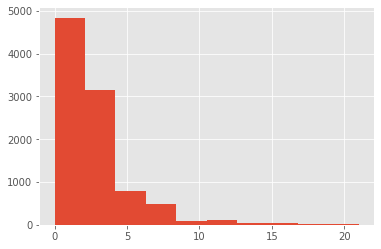

In [16]:
df.Experience.hist()

### D'après les histogrammes on constate :

In [17]:
df['Exp_label'] = np.nan
df.loc[(df['Experience'] >= 0) & (df['Experience'] < 2), 'Exp_label'] = 'débutant'
df.loc[(df['Experience'] >= 2) & (df['Experience'] < 5), 'Exp_label'] = 'confirmé'
df.loc[(df['Experience'] >= 5) & (df['Experience'] < 10), 'Exp_label'] = 'avancé'
df.loc[(df['Experience'] >= 10) , 'Exp_label'] = 'expert'
df.head(10)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,débutant
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille,confirmé
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,confirmé
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille,débutant
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux,confirmé
5,S&P Global Ratings,Lead data scientist,VBA/Python/Excel/R,Master,6.0,Lille,avancé
6,NVIDIA,Data scientist,Excel/VBA/R/Python/PySpark,Bachelor,0.0,Lille,débutant
7,Cedars-Sinai Medical Center,Data scientist,Java/C/C++/R/Python,Bachelor,4.0,Toulouse,confirmé
8,Fibroblast,Data architecte,Java/Linux/Docker,Bachelor,8.0,Paris,avancé
9,General Motors,Data engineer,Python/Java/Linux/GNU,Master,5.0,Toulouse,avancé


### 7) Quelles sont les 5 technologies les plus utilisées? Faites un graphique

In [18]:
import itertools 

### Puisque téchnologies est un text: on construit des listes en splitant par '/' après on fusionne tous les listes en une seule 'technologies', puis on construit un dictionnaire dont les clés est la technologie la valeur est le nombre d'occurence

In [19]:
technologies = list(itertools.chain(*df.Technologies.apply(str.split,args = ("/"))))
technologies = list(filter(("").__ne__, technologies))
technologies = list(map(lambda x:x.lower(),technologies))

In [20]:
from collections import Counter
top_Values = dict(Counter(technologies).most_common(5))
print(top_Values)

{'python': 6627, 'r': 4374, 'sql': 2581, 'java': 1719, 'hadoop': 1589}


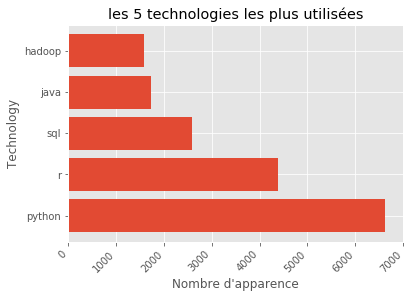

In [21]:
fig, ax = plt.subplots()
ax.barh(list(top_Values.keys()), list(top_Values.values()))

labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 7000], xlabel="Nombre d'apparence", ylabel='Technology',
       title="les 5 technologies les plus utilisées")

plt.show()

In [22]:
df.head()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,débutant
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille,confirmé
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,confirmé
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille,débutant
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux,confirmé


### 8) Réaliser une méthode de clustering non supervisée de votre choix pour faire apparaître 2 clusters que vous jugerez pertinents. Donnez les caractéristiques de chacun des clusters.
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

### Puisque le clustering s'applique sur une dataset numérique et comme on a tous les variables sont catégoriales sauf Expérience alors on applique le clustering sur l'expérience

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(df[['Experience']])
y_kmeans = kmeans.predict(df[['Experience']])

[[1.88195186]
 [7.47864322]]


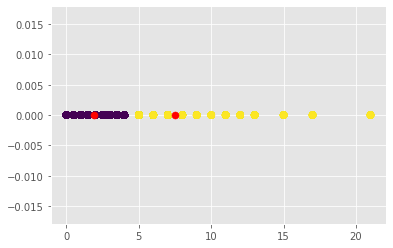

In [24]:
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['Experience'], np.zeros(len(y_kmeans)), c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], np.zeros(2), c='red', s=50)
plt.show()

In [25]:
# Métrique utilisée est silhouette score
from sklearn.metrics import silhouette_score


silhouette_score(df[['Experience']], y_kmeans, metric = 'euclidean')

0.678994398421177

# Interpretation 

## Cluster 1 = Année d'exp < 5  ( Mauve)
## Cluster 2 = Année d'exp >= 5  (Jaune) 
## Comme silhouette_score = 0.68 c-a-d un résultat pas mal.
https://en.wikipedia.org/wiki/Silhouette_(clustering)

### 9) Réaliser la prédiction des métiers manquants dans la base de données par l'algorithme de votre choix
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

In [26]:
df.isna().sum()

Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience       0
Ville            0
Exp_label        0
dtype: int64

In [27]:
df.columns

Index(['Entreprise', 'Metier', 'Technologies', 'Diplome', 'Experience',
       'Ville', 'Exp_label'],
      dtype='object')

## Définition des datasets

In [28]:
data = df[['Metier','Diplome', 'Experience']]

### Convertir Téchnologie en Encodage one-hot
 

In [29]:
list_of_tech = set(technologies)

In [30]:
for tech in list_of_tech:
  data[tech] = 0
  data.loc[df["Technologies"].notnull() & df['Technologies'].str.contains(tech,regex = False , na =False), tech] = 1


C:\Users\33617\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\33617\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [31]:
data.head(10)

,Metier,Diplome,Experience,vba,c++,mongodb,hbase,python,mysql,cassandra,...,kafka,nosq,sql,docker,perl,aws,scoring,matlab,pig,elasticsearch
0,Data scientist,Master,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Data architecte,Master,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Lead data scientist,Master,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Data scientist,Master,1.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Data scientist,Phd,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Lead data scientist,Master,6.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Data scientist,Bachelor,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Data scientist,Bachelor,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Data architecte,Bachelor,8.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Data engineer,Master,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### test c'est data qui a des nan en Metier

In [32]:
test = data.loc[df["Metier"].isna()]

In [33]:
test.head()

,Metier,Diplome,Experience,vba,c++,mongodb,hbase,python,mysql,cassandra,...,kafka,nosq,sql,docker,perl,aws,scoring,matlab,pig,elasticsearch
346,NaN,No diploma,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2058,NaN,Master,15.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2670,NaN,Master,1.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2899,NaN,Phd,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3346,NaN,Master,7.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
train = data.dropna(axis=0)

In [35]:
train.head()

,Metier,Diplome,Experience,vba,c++,mongodb,hbase,python,mysql,cassandra,...,kafka,nosq,sql,docker,perl,aws,scoring,matlab,pig,elasticsearch
0,Data scientist,Master,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Data architecte,Master,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Lead data scientist,Master,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Data scientist,Master,1.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Data scientist,Phd,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
train.shape

(9563, 59)

In [37]:
test.shape

(19, 59)

In [38]:
data.Metier.unique()

array(['Data scientist', 'Data architecte', 'Lead data scientist',
       'Data engineer', nan], dtype=object)

### Utilisant des labels encoder pour Metier et Diplome

In [39]:
from sklearn import preprocessing
le1 = preprocessing.LabelEncoder()
le1.fit(['Data scientist', 'Data architecte', 'Lead data scientist','Data engineer'])


LabelEncoder()

In [40]:
le1.inverse_transform([0,1,2,3])

array(['Data architecte', 'Data engineer', 'Data scientist',
       'Lead data scientist'], dtype='<U19')

In [41]:
train["Metier"] = le1.transform(train["Metier"])

C:\Users\33617\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
data.Diplome.unique()

array(['Master', 'Phd', 'Bachelor', 'No diploma'], dtype=object)

In [43]:
le = preprocessing.LabelEncoder()

le.fit(['Master', 'Phd', 'Bachelor', 'No diploma'])

train["Diplome"] = le.transform(train["Diplome"])


C:\Users\33617\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [44]:
train.head()

,Metier,Diplome,Experience,vba,c++,mongodb,hbase,python,mysql,cassandra,...,kafka,nosq,sql,docker,perl,aws,scoring,matlab,pig,elasticsearch
0,2,1,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1,1.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,3,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
test["Diplome"] = le.transform(test["Diplome"])


C:\Users\33617\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
test.head()

,Metier,Diplome,Experience,vba,c++,mongodb,hbase,python,mysql,cassandra,...,kafka,nosq,sql,docker,perl,aws,scoring,matlab,pig,elasticsearch
346,NaN,2,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2058,NaN,1,15.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2670,NaN,1,1.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2899,NaN,3,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3346,NaN,1,7.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
train.columns

Index(['Metier', 'Diplome', 'Experience', 'vba', 'c++', 'mongodb', 'hbase',
       'python', 'mysql', 'cassandra', 'windows', 'spss', 'deep learning',
       'big data', 'pyspark', 'scikit-learn', 'vertica', 'teradata',
       'map-reduce', 'hive', 'c', 'mariadb', 'machine learning', 'hdfs', 'gnu',
       'tensorflow', 'java', 'yarn', 'spark', 'kibana', 'ruby', 'r', 'excel',
       'pycharm', 'sas', 'nosql', 'hadoop', 'hadoop(hdfs)', 'scala', 'anglais',
       'oracle', 'microsoft azure', 'redshift', 'tableau', 'numpy', 'ai',
       'postgresql', 'linux', 'matplotlib', 'kafka', 'nosq', 'sql', 'docker',
       'perl', 'aws', 'scoring', 'matlab', 'pig', 'elasticsearch'],
      dtype='object')

In [48]:
x = train.columns


### Phase d'apprentissage

In [49]:
y = train["Metier"]
X = train.drop(["Metier"], axis=1)

In [50]:
X_test= test.drop(["Metier"], axis=1)

### Definition des arbres de décisions

In [51]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [52]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1) # 70% training and 30% test

In [53]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=50)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_val)

### On trouve un score moyen de 0.56 avec une arbre de 50 de profondeur

In [54]:
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

Accuracy: 0.5645582854155776


### Prédiction pour data test

In [55]:
X_test.head()

,Diplome,Experience,vba,c++,mongodb,hbase,python,mysql,cassandra,windows,...,kafka,nosq,sql,docker,perl,aws,scoring,matlab,pig,elasticsearch
346,2,2.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2058,1,15.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2670,1,1.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2899,3,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3346,1,7.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
X_test= test.drop(["Metier"], axis=1)

In [57]:
pred = clf.predict(X_test)

In [58]:
pred

array([1, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 1, 0, 2, 0, 2, 0, 2, 1])

In [59]:
X_test['Metier'] = pred

In [60]:
X_test

,Diplome,Experience,vba,c++,mongodb,hbase,python,mysql,cassandra,windows,...,nosq,sql,docker,perl,aws,scoring,matlab,pig,elasticsearch,Metier
346,2,2.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2058,1,15.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2670,1,1.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2899,3,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3346,1,7.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4248,3,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4290,3,1.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4292,1,8.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
5425,2,5.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5593,1,3.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


### Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=50, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_val)

In [62]:
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

Accuracy: 0.5608991113434396


In [63]:
X_test.head()
X_test= test.drop(["Metier"], axis=1)
pred = clf.predict(X_test)
X_test['Metier'] = pred
X_test

,Diplome,Experience,vba,c++,mongodb,hbase,python,mysql,cassandra,windows,...,nosq,sql,docker,perl,aws,scoring,matlab,pig,elasticsearch,Metier
346,2,2.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2058,1,15.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2670,1,1.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2899,3,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3346,1,7.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4248,3,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4290,3,1.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4292,1,8.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
5425,2,5.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5593,1,3.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
